In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.metrics import r2_score
import csv
import math

In [124]:
file1 = 'combined_data.csv'

In [125]:
df1 = pd.read_csv(file1)

pd_data.head(10) = 
   Unnamed: 0  Unnamed: 0.1  Year             County  Deaths  Population  \
0           0             0  2015       Adams County      13       22006   
1           1             1  2015       Allen County      21       82914   
2           2             2  2015   Ashtabula County      24       79192   
3           3             3  2015     Belmont County      18       57540   
4           4             4  2015       Brown County      26       34930   
5           5             5  2015      Butler County     201      296652   
6           6             6  2015       Clark County      78      108703   
7           7             7  2015    Clermont County     104      159508   
8           8             8  2015     Clinton County      22       33175   
9           9             9  2015  Columbiana County      32       85642   

   Crude Rate  Crude Rate Lower 95% Confidence Interval  \
0  Unreliable                                      31.5   
1        25.3            

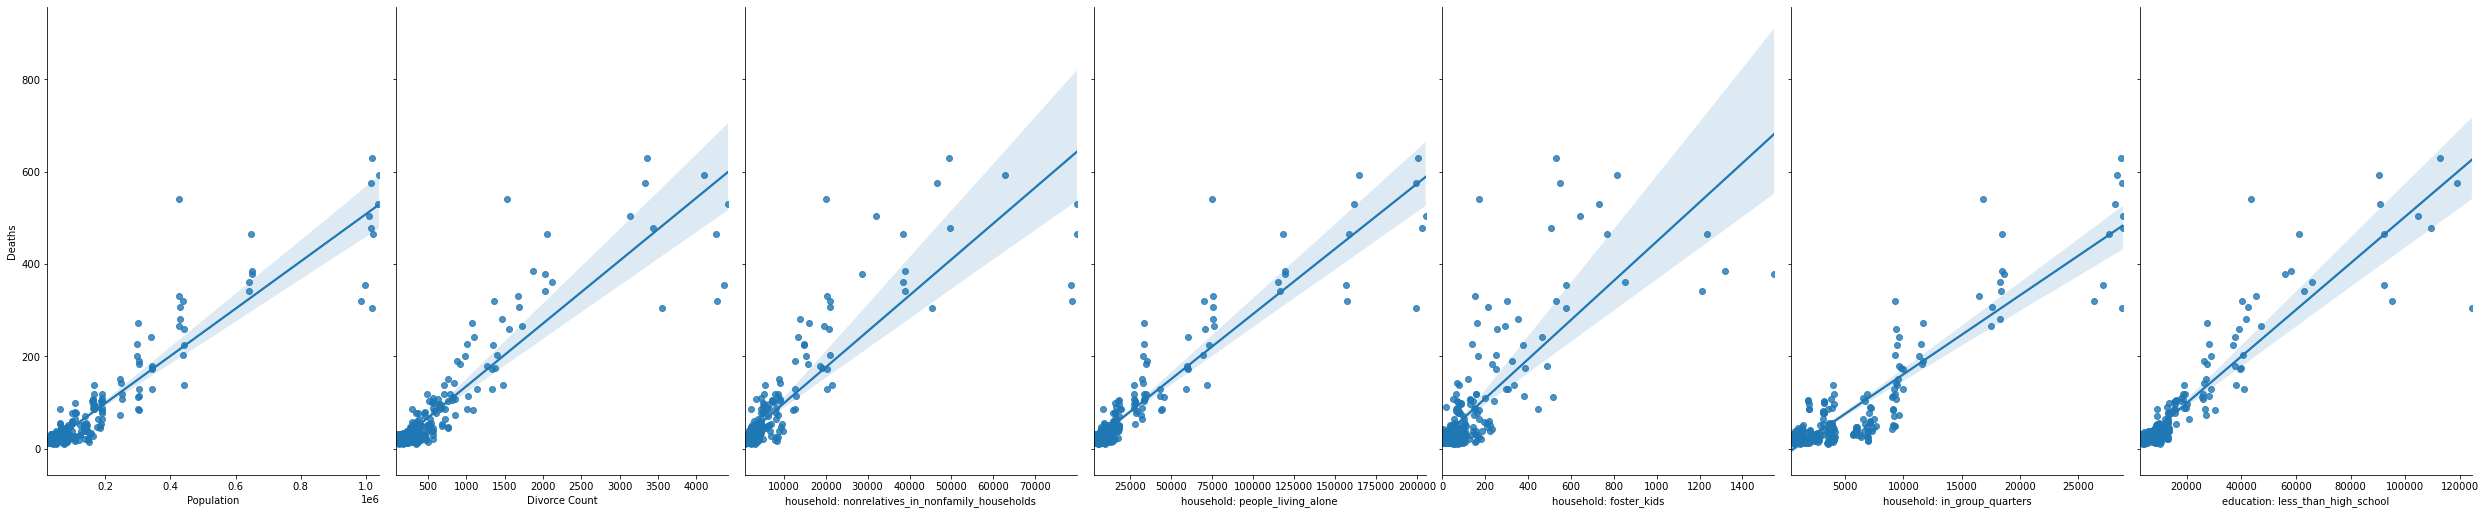

In [126]:
# check the scatter plot
pd_data = pd.read_csv(file1)
print('pd_data.head(10) = \n{}'.format(pd_data.head(10)))
sns.pairplot(pd_data, x_vars=['Population', 'Divorce Count','household: nonrelatives_in_nonfamily_households', 'household: people_living_alone', 'household: foster_kids', 'household: in_group_quarters', 'education: less_than_high_school'], y_vars = 'Deaths', kind = 'reg', height = 7, aspect = 0.7)
plt.savefig("scatterplot_original.jpg")
plt.show()



parameters of training set and test set:
x_train.shape=(200, 7)
 x_test.shape=(200,)
, y_test.shape=(50, 7)
parameters of model:
LinearRegression()
model intercept
-5.3548869629566695
parameter weights
[ 4.20009883e-04 -3.82438645e-02 -1.93600236e-03  9.49403475e-04
  4.42262687e-02  4.41279470e-03  1.30110249e-05]
RMSE: 36.29285976159319
Rsquare score: 0.9370600442281362


<function matplotlib.pyplot.show(*args, **kw)>

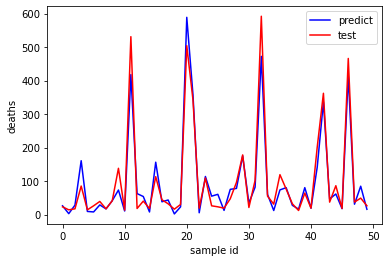

In [127]:
#train our model
from sklearn.model_selection import train_test_split#cross-verification
from sklearn.linear_model import LinearRegression

x = pd_data.loc[:, ('Population', 'Divorce Count', 'household: nonrelatives_in_nonfamily_households', 'household: people_living_alone', 'household: foster_kids','household: in_group_quarters', 'education: less_than_high_school')]
y = pd_data.loc[:, 'Deaths']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 200)#set 20% of the data as test set
print('parameters of training set and test set:')
print('x_train.shape={}\n x_test.shape={}\n, y_test.shape={}'.format(x_train.shape, y_train.shape, x_test.shape,y_test.shape))

linreg = LinearRegression()
model = linreg.fit(x_train, y_train)
print('parameters of model:')
print(model)
print('model intercept')
print(linreg.intercept_)
print('parameter weights')
print(linreg.coef_)

y_pred = linreg.predict(x_test)
sum_mean = 0
for i in range(len(y_pred)):
    sum_mean += (y_pred[i] - y_test.values[i]) **2
sum_erro = np.sqrt(sum_mean/len(y_pred))#the scale of test set

#calculate RMSE
print('RMSE:', sum_erro)

#calculate Rsquare score
print('Rsquare score:', r2_score(y_test,y_pred))

# plot ROC
plt.figure()
plt.plot(range(len(y_pred)), y_pred, 'b', label = 'predict')
plt.plot(range(len(y_pred)), y_test, 'r', label = 'test')
plt.legend(loc='upper right')
plt.xlabel('sample id')
plt.ylabel('deaths')
plt.savefig("ROC1.jpg")
plt.show



In [129]:
# log(n+1) tranformation
df2 = pd.read_csv(file1)
df2["Deaths_1"] = df2["Deaths"]+1
df2["Population_1"] = df2["Population"]+1
df2["Divorce Count_1"] = df2["Divorce Count"]+1
df2["household: nonrelatives_in_nonfamily_households_1"] = df2["household: nonrelatives_in_nonfamily_households"]+1
df2["household: people_living_alone_1"] = df2["household: people_living_alone"]+1
df2["education: less_than_high_school_1"] = df2["education: less_than_high_school"]+1
df2["household: foster_kids_1"] = df2["household: foster_kids"]+1
df2["household: in_group_quarters_1"] = df2["household: in_group_quarters"]+1

In [130]:
df2["log_Deaths"] = df2["Deaths_1"].apply(np.log10)
df2["log_Population"] = df2["Population_1"].apply(np.log10)
df2["log_Divorce Count"] = df2["Divorce Count_1"].apply(np.log10)
df2["log_household: nonrelatives_in_nonfamily_households"] = df2["household: nonrelatives_in_nonfamily_households_1"].apply(np.log10)
df2["log_household: people_living_alone"] = df2["household: people_living_alone_1"].apply(np.log10)
df2["log_education: less_than_high_school"] = df2["education: less_than_high_school_1"].apply(np.log10)
df2["log_household: foster_kids"] = df2["household: foster_kids_1"].apply(np.log10)
df2["log_household: in_group_quarters"] = df2["household: in_group_quarters_1"].apply(np.log10)

parameters of training set and test set:
x_train2.shape=(200, 7)
 x_test2.shape=(200,)
, y_test2.shape=(50, 7)
parameters of model:
LinearRegression()
model intercept
-2.2062849146459707
parameter weights
[-0.27290662  0.09022445  0.1110025  -0.02440366  0.45247831  0.01335126
  0.67287387]
RMSE: 0.10586762914749749
Rsquare score: 0.9478756313263983


<function matplotlib.pyplot.show(*args, **kw)>

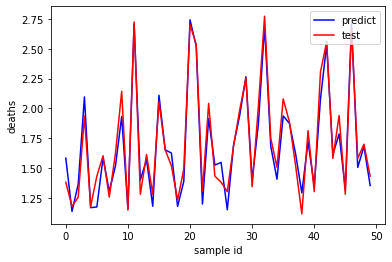

In [131]:
#train model 2
from sklearn.model_selection import train_test_split#cross-verification
from sklearn.linear_model import LinearRegression

x = df2.loc[:, ('log_Population', 'log_Divorce Count','log_household: nonrelatives_in_nonfamily_households',"log_household: foster_kids", 'log_household: people_living_alone', 'log_household: in_group_quarters', 'log_education: less_than_high_school')]
y = df2.loc[:, 'log_Deaths']
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.2, random_state = 200)#set 20% of the data as test set
print('parameters of training set and test set:')
print('x_train2.shape={}\n x_test2.shape={}\n, y_test2.shape={}'.format(x_train2.shape, y_train2.shape, x_test2.shape,y_test2.shape))

linreg = LinearRegression()
model2 = linreg.fit(x_train2, y_train2)
print('parameters of model:')
print(model2)
print('model intercept')
print(linreg.intercept_)
print('parameter weights')
print(linreg.coef_)

y_pred2 = linreg.predict(x_test2)
sum_mean = 0
for i in range(len(y_pred2)):
    sum_mean += (y_pred2[i] - y_test2.values[i]) **2
sum_erro = np.sqrt(sum_mean/len(y_pred2))#the scale of test set

#calculate RMSE
print('RMSE:', sum_erro)

#calculate Rsquare score
print('Rsquare score:', r2_score(y_test2,y_pred2))

# plot ROC
plt.figure()
plt.plot(range(len(y_pred2)), y_pred2, 'b', label = 'predict')
plt.plot(range(len(y_pred2)), y_test2, 'r', label = 'test')
plt.xlabel('sample id')
plt.ylabel('deaths')
plt.legend(loc='upper right')
plt.savefig("predict_log.jpg")
plt.show

end


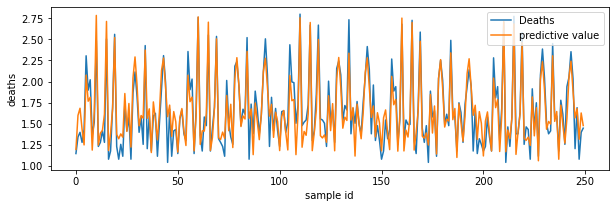

In [132]:
# total set
pd_data = df2
sam = []
a = ['log_Deaths', 'log_Population', 'log_Divorce Count','log_household: nonrelatives_in_nonfamily_households', 'log_household: people_living_alone', 'log_household: in_group_quarters', 'log_education: less_than_high_school']
dic={}
for i in a:
    y = pd_data.loc[:,i]
    dic[i] = list(y)
for i in range(len(dic['log_Deaths'])):
    x = -1.8076284103979925 + float(dic['log_Population'][i]) * (-0.3901878) + float(dic['log_Divorce Count'][i]) * 0.21042677 + float(dic['log_household: nonrelatives_in_nonfamily_households'][i]) * 0.10722726 + float(dic['log_household: people_living_alone'][i]) * 0.38773294 + float(dic['log_household: in_group_quarters'][i]) * (0.04830405) + float(dic['log_education: less_than_high_school'][i]) * (0.67124225)
    sam.append(x)
    
with open('final_test_log.csv','w') as file:
    writer = csv.writer(file)
    writer.writerow(['Deaths','predictive value'])
    for i in range(len(sam)):
        writer.writerow([dic['log_Deaths'][i],sam[i]])
                         
print('end')
pd_data = pd.read_csv('final_test_log.csv')
pd_data.plot(figsize = (10,3))
plt.xlabel('sample id')
plt.ylabel('deaths')
plt.legend(loc='upper right')
plt.show()

In [133]:
error1 = np.sqrt((y_test - y_pred) ** 2)
log_error1 = error1.apply(np.log10)
error2 = np.sqrt((y_test2 - y_pred2) ** 2)

[Text(0, 0.5, 'density'), Text(0.5, 0, 'standard error')]

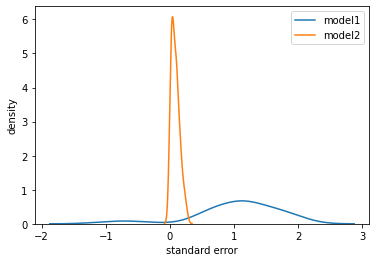

In [134]:
ax = sns.kdeplot(log_error1, label = 'model1')
sns.kdeplot(error2, label = 'model2')
ax.set(xlabel='standard error', ylabel = 'density')

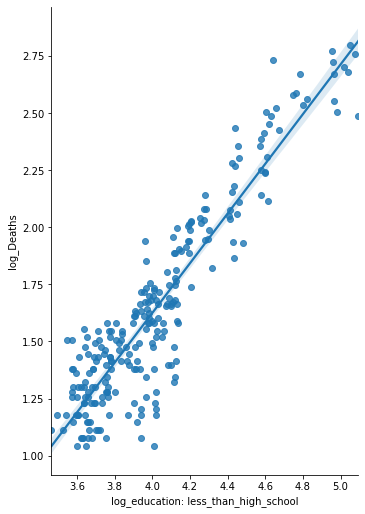

In [135]:
#simple regression between education and deaths
sns.pairplot(df2, x_vars=['log_education: less_than_high_school'], y_vars = 'log_Deaths', kind = 'reg', height = 7, aspect = 0.7)
plt.show()


In [136]:
pd.DataFrame(x_train).shape

(200, 7)

In [137]:
linreg = LinearRegression()
x = df2.loc[:, 'log_education: less_than_high_school']
y = df2.loc[:, 'log_Deaths']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 232)#set 20% of the data as test set
print('parameters of training set and test set:')
print('x_train.shape={}\n x_test.shape={}\n, y_test.shape={}'.format(x_train.shape, y_train.shape, x_test.shape,y_test.shape))

linreg = LinearRegression()
model3 = linreg.fit(pd.DataFrame(x_train), pd.DataFrame(y_train))
print('parameters of model:')
print(model3)
print('model intercept')
print(linreg.intercept_)
print('parameter weights')
print(linreg.coef_)


parameters of training set and test set:
x_train.shape=(200,)
 x_test.shape=(200,)
, y_test.shape=(50,)
parameters of model:
LinearRegression()
model intercept
[-2.66112207]
parameter weights
[[1.07046341]]


In [138]:
y_pred = linreg.predict(pd.DataFrame(x_test))
sum_mean = 0
for i in range(len(y_pred)):
    sum_mean += (y_pred[i] - y_test.values[i]) **2
sum_erro = np.sqrt(sum_mean/len(y_pred))#the scale of test set

#calculate RMSE and rsquare score
print('RMSE:', sum_erro)

print('Rsquare score:', r2_score(y_test,y_pred))

RMSE: [0.16480306]
Rsquare score: 0.8417323370255617
